<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Creating-population" data-toc-modified-id="Creating-population-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Creating population</a></span></li><li><span><a href="#Dividing-population-in-large-and-small-groups" data-toc-modified-id="Dividing-population-in-large-and-small-groups-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Dividing population in large and small groups</a></span></li><li><span><a href="#Reproduction-in-population" data-toc-modified-id="Reproduction-in-population-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Reproduction in population</a></span></li><li><span><a href="#Updating-population" data-toc-modified-id="Updating-population-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Updating population</a></span></li><li><span><a href="#Evolutionary-Algorithm-Workflow" data-toc-modified-id="Evolutionary-Algorithm-Workflow-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Evolutionary Algorithm Workflow</a></span></li><li><span><a href="#Data-Visualization" data-toc-modified-id="Data-Visualization-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Data Visualization</a></span><ul class="toc-item"><li><span><a href="#Correlation-between-large-group-size-and-selfish-resource-usage" data-toc-modified-id="Correlation-between-large-group-size-and-selfish-resource-usage-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Correlation between large group size and selfish resource usage</a></span></li><li><span><a href="#Population-Distribution-over-generations" data-toc-modified-id="Population-Distribution-over-generations-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Population Distribution over generations</a></span></li></ul></li><li><span><a href="#Varying-Parameters" data-toc-modified-id="Varying-Parameters-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Varying Parameters</a></span><ul class="toc-item"><li><span><a href="#Same-Growth-Rate-(Selfish-and-Cooperative)" data-toc-modified-id="Same-Growth-Rate-(Selfish-and-Cooperative)-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Same Growth Rate (Selfish and Cooperative)</a></span></li><li><span><a href="#Varying-K-(Death-Rate)" data-toc-modified-id="Varying-K-(Death-Rate)-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Varying K (Death Rate)</a></span></li></ul></li></ul></div>

# Individual Selection for Cooperative Group Formation

In [1]:
import pandas as pd
import numpy as np
import math
import random
import itertools
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sns

## Creating population

In [2]:
def create_pool(size):
    '''
    Creating an initial population containing 4 different types of 
    individuals: 

    SL: Selfish and Large
    SS: Selfish and Small
    CL: Cooperative and Large
    CS: Cooperative and Small
    '''
    res = np.repeat(['SL', 'SS', 'CL', 'CS'], size/4)
    random.shuffle(res)
    return res

## Dividing population in large and small groups

In [3]:
def divide_in_groups(pool, large_g=40, small_g=4):
    '''
    Dividing the current population into two main divisions: one containing
    all the different types of large individuals and one containing instead
    all the types of small individuals. These two divisions are additionally
    splitted in multiple groups depending on the large_g and small_g parameters
    which represent respectively the fixed group size that each large and small
    group should have. If there are not enough individuals left to fill a group
    they are automatically discarded.
    '''
    large = [ind for ind in pool if ind[1] == 'L']
    small = [ind for ind in pool if ind[1] == 'S']
    discard_large = int(large_g*(len(large)/large_g - math.floor(len(large)/large_g)))
    discard_small = int(small_g*(len(small)/small_g - math.floor(len(small)/small_g)))
    try:
        groups_l = np.array(large[: len(large) - discard_large])
        groups_l = groups_l.reshape(math.floor(len(large)/large_g), -1)
    except:
        if groups_l.size == 0:
            groups_s = np.array(small[: len(small) - discard_small])
            groups_s = groups_s.reshape(math.floor(len(small)/small_g), -1)
            return groups_l, groups_s
        groups_l = np.array(large[: len(large) - discard_large - 1])
        groups_l = groups_l.reshape(math.floor(len(large)/large_g), -1)
    try:
        groups_s = np.array(small[: len(small) - discard_small])
        groups_s = groups_s.reshape(math.floor(len(small)/small_g), -1)
    except:
        if groups_s.size == 0:
            return groups_l, groups_s
        groups_s = np.array(small[: len(small) - discard_small -1])
        groups_s = groups_s.reshape(math.floor(len(small)/small_g), -1)
    return groups_l, groups_s

## Reproduction in population

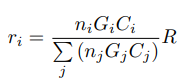

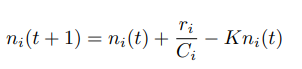

In [4]:
def reproduction(large_gs, small_gs, disposal_limit = 4, large_r=50, small_r=4, self_g=0.02, coop_g=0.018, self_c=0.2, coop_c=0.1, K=0.1):
    '''
    Reproduction takes place just within divisions and they are dependent
    on the magnitude of the share of the total group resource that the 
    genotype receives and the replicator equations (shown above). 
    Therefore, the reproduction results are highly dependent of the disposal
    time and the equations parameters.
    '''
    i = 0
    large_g_res = [[]]*len(large_gs)
    small_g_res = [[]]*len(small_gs)
    for large_g, small_g in itertools.zip_longest(large_gs, small_gs):
        if large_g is None:
            unique, counts = np.unique(small_g, return_counts=True)
            small_counts = dict(zip(unique, counts))
            disp_time = 0
            small_coop_individuals = small_counts.get('CS', 0) 
            small_self_individuals = small_counts.get('SS', 0)
            while disp_time != disposal_limit:
                small_coop_R_i = (small_coop_individuals*coop_g*coop_c)/(small_coop_individuals*coop_g*coop_c + small_self_individuals*self_g*self_c)*small_r
                small_self_R_i = (small_self_individuals*self_g*self_c)/(small_self_individuals*self_g*self_c + small_coop_individuals*coop_g*coop_c)*small_r
                small_coop_individuals = small_coop_individuals + small_coop_R_i/coop_c - K*small_coop_individuals
                small_self_individuals = small_self_individuals + small_self_R_i/self_c - K*small_self_individuals
                disp_time += 1

            small_g_res[i] = []
            small_g_res[i].extend(['CS'] * int(small_coop_individuals))
            small_g_res[i].extend(['SS'] * int(small_self_individuals))
            i+= 1
        else:
            unique, counts = np.unique(large_g, return_counts=True)
            large_counts = dict(zip(unique, counts))
            disp_time = 0
            large_coop_individuals = large_counts.get('CL', 0)
            large_self_individuals = large_counts.get('SL', 0)
            unique, counts = np.unique(small_g, return_counts=True)
            small_counts = dict(zip(unique, counts))
            small_coop_individuals = small_counts.get('CS', 0) 
            small_self_individuals = small_counts.get('SS', 0)
            while disp_time != disposal_limit:
                large_coop_R_i = (large_coop_individuals*coop_g*coop_c)/(large_coop_individuals*coop_g*coop_c + large_self_individuals*self_g*self_c)*large_r
                large_self_R_i = (large_self_individuals*self_g*self_c)/(large_self_individuals*self_g*self_c + large_coop_individuals*coop_g*coop_c)*large_r
                large_coop_individuals = large_coop_individuals + large_coop_R_i/coop_c - K*large_coop_individuals
                large_self_individuals = large_self_individuals + large_self_R_i/self_c - K*large_self_individuals
                small_coop_R_i = (small_coop_individuals*coop_g*coop_c)/(small_coop_individuals*coop_g*coop_c + small_self_individuals*self_g*self_c)*small_r
                small_self_R_i = (small_self_individuals*self_g*self_c)/(small_self_individuals*self_g*self_c + small_coop_individuals*coop_g*coop_c)*small_r
                small_coop_individuals = small_coop_individuals + small_coop_R_i/coop_c - K*small_coop_individuals
                small_self_individuals = small_self_individuals + small_self_R_i/self_c - K*small_self_individuals
                disp_time += 1

            large_g_res[i] = []
            large_g_res[i].extend(['CL'] * int(large_coop_individuals))
            large_g_res[i].extend(['SL'] * int(large_self_individuals))
            small_g_res[i] = []
            small_g_res[i].extend(['CS'] * int(small_coop_individuals))
            small_g_res[i].extend(['SS'] * int(small_self_individuals))
            i+= 1
    
    return large_g_res, small_g_res

## Updating population

In [7]:
def update_pool(large_gs, small_gs):
    '''
    In this case, are taken as input the two divisions which had undergone
    reproduction and are merged together to create a pool like the one created
    in the initialization step. In this situation, we need to make sure that 
    overall population size remains the same.
    '''
    res = reduce(lambda x,y :x+y ,large_gs, []) + reduce(lambda x,y :x+y , small_gs, [])
    unique, counts = np.unique(res, return_counts=True)
    pop_counts = dict(zip(unique, counts))
    new_pop_elements = [int(((i/len(res))*pop)) for i in pop_counts.values()]
    res = np.repeat([*pop_counts.keys()], new_pop_elements).tolist()
    random.shuffle(res)
    return res

## Evolutionary Algorithm Workflow

1. Initialisation: Initialise the migrant pool with N individuals.
2. Group formation (aggregation): Assign individuals in the migrant pool
to groups, as described in the main text below.
3. Reproduction: Perform reproduction within groups for t time-steps, as
described in the text above.
4. Migrant pool formation (dispersal): Return the progeny of each group
to the migrant pool.
5. Maintaining the global carrying capacity: Rescale the migrant pool
back to size N, retaining the proportion of individuals with each genotype.
6. Iteration: Repeat from step 2 onwards for a number of generations, T.

In [6]:
pop = 4000
iter_num = 1000 
d = {'Iteration Num': [0], 'Selfish and Large': [1000], 'Selfish and Small': [1000],
    'Cooperative and Large': [1000], 'Cooperative and Small': [1000]}
df = pd.DataFrame(data=d)
migrant_pool = create_pool(pop)
for i in range(1, iter_num+1):
    large_group, small_group = divide_in_groups(migrant_pool)
    large_group, small_group = reproduction(large_group, small_group)
    migrant_pool = update_pool(large_group, small_group)
    unique, counts = np.unique(migrant_pool, return_counts=True)
    res_counts = dict(zip(unique, counts))
    df = df.append({ "Iteration Num": i,
                     "Selfish and Large": res_counts.get('SL', 0),
                     "Selfish and Small": res_counts.get('SS', 0),
                     "Cooperative and Large": res_counts.get('CL', 0),
                     "Cooperative and Small": res_counts.get('CS', 0),
                      }, ignore_index=True)
    if i % 50 == 0 :
        print('Iteration Number:', i)
    
df.head()

Iteration Number: 50
Iteration Number: 100
Iteration Number: 150
Iteration Number: 200
Iteration Number: 250
Iteration Number: 300
Iteration Number: 350
Iteration Number: 400
Iteration Number: 450
Iteration Number: 500
Iteration Number: 550
Iteration Number: 600
Iteration Number: 650
Iteration Number: 700
Iteration Number: 750
Iteration Number: 800
Iteration Number: 850
Iteration Number: 900
Iteration Number: 950
Iteration Number: 1000


,Iteration Num,Selfish and Large,Selfish and Small,Cooperative and Large,Cooperative and Small
0,0,1000,1000,1000,1000
1,1,1203,906,995,894
2,2,1397,831,951,819
3,3,1583,763,889,764
4,4,1755,708,810,726


Selfish and Large
Mean:  56.327672327672325 Std:  321.4581421993898
Selfish and Small
Mean:  39.968031968031966 Std:  168.90004071423468
Cooperative and Large
Mean:  9.197802197802197 Std:  79.1346860525058
Cooperative and Small
Mean:  3894.3916083916083 Std:  512.7830068142116


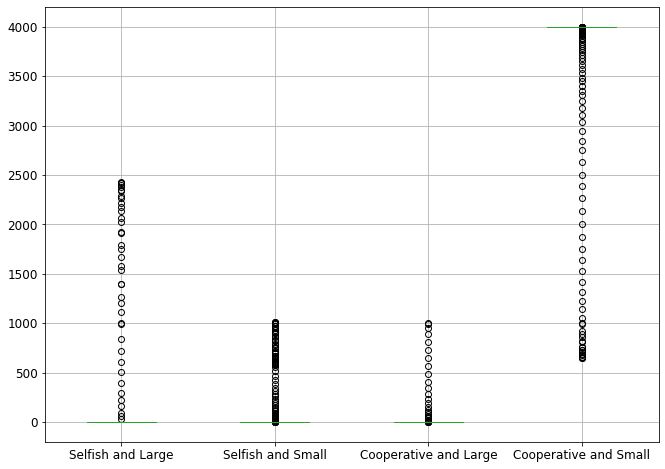

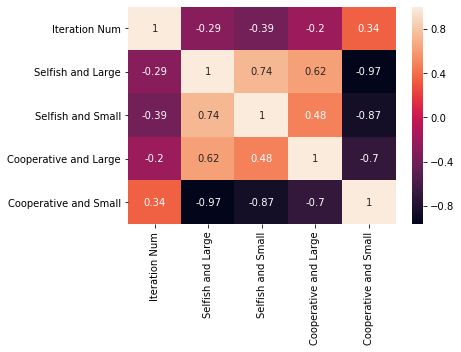

In [16]:
def stats(df):
    '''
    Statistical analysis summary of the experiment
    (eg. Mean and Std of each column, box plot showing 
    data distribution of each column and correlation matrix of the dataframe)
    '''
    for i in range(1, len(df.columns)):
        print(df.columns.values[i])
        print('Mean: ', np.mean(df.iloc[:,i]), 'Std: ', np.std(df.iloc[:,i]))
        #plt.boxplot(df.iloc[:,i])
        #plt.show()

    # x = [np.mean(df.iloc[:,i]) for i in range(1, 5)]
    # e = [np.std(df.iloc[:,i]) for i in range(1, 5)]
    # y = [0 for i in range(1, 5)]

    # plt.errorbar(x, y, e, linestyle='None', marker='o')
    # plt.xlabel('Mean')
    # plt.ylabel('Standard Deviation')
    # plt.show()
    df.iloc[:,1:].plot.box(rot=0, fontsize=12, figsize=(11, 8), grid=True)
    plt.show()
    
    # corr = df.corr()
    # corr.style.background_gradient(cmap='coolwarm').set_precision(3)
    sns.heatmap(df.corr(), annot=True)
    
stats(df)

## Data Visualization

### Correlation between large group size and selfish resource usage

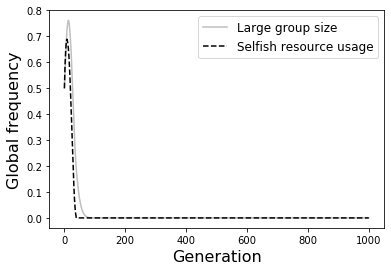

In [8]:
tot = (df['Selfish and Small'] + df['Selfish and Large']+ df['Cooperative and Large'] + df['Cooperative and Small'])
plt.plot(df['Iteration Num'], (df['Selfish and Small'] + df['Selfish and Large'])/tot, '0.75', 
         label = 'Large group size')
plt.plot(df['Iteration Num'], (df['Selfish and Large'] + df['Cooperative and Large'])/tot, 'k--', 
         label = 'Selfish resource usage')
plt.xlabel("Generation", fontsize=16)
plt.ylabel("Global frequency", fontsize=16)
plt.legend(fontsize=12)

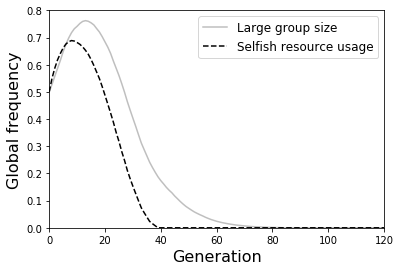

In [9]:
plt.plot(df['Iteration Num'], (df['Selfish and Small'] + df['Selfish and Large'])/tot, '0.75', 
         label = 'Large group size')
plt.plot(df['Iteration Num'], (df['Selfish and Large'] + df['Cooperative and Large'])/tot, 'k--', 
         label = 'Selfish resource usage')
plt.xlim(0, 120)
plt.ylim(0, 0.8)
plt.xlabel("Generation", fontsize=16)
plt.ylabel("Global frequency", fontsize=16)
plt.legend(fontsize=12)

### Population Distribution over generations

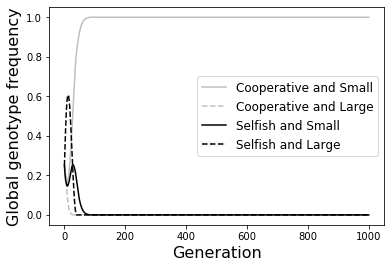

In [10]:
plt.plot(df['Iteration Num'], df['Cooperative and Small']/tot, '0.75', label = 'Cooperative and Small')
plt.plot(df['Iteration Num'], df['Cooperative and Large']/tot, '--', color= '0.75', label = 'Cooperative and Large')
plt.plot(df['Iteration Num'], df['Selfish and Small']/tot, 'k', label = 'Selfish and Small')
plt.plot(df['Iteration Num'], df['Selfish and Large']/tot, 'k--', label = 'Selfish and Large')
plt.xlabel("Generation", fontsize=16)
plt.ylabel("Global genotype frequency", fontsize=16)
plt.legend(fontsize=12)

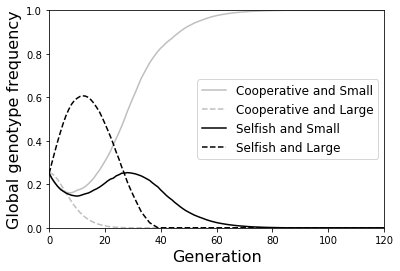

In [11]:
plt.plot(df['Iteration Num'], df['Cooperative and Small']/tot, '0.75', label = 'Cooperative and Small')
plt.plot(df['Iteration Num'], df['Cooperative and Large']/tot, '--', color= '0.75', label = 'Cooperative and Large')
plt.plot(df['Iteration Num'], df['Selfish and Small']/tot, 'k', label = 'Selfish and Small')
plt.plot(df['Iteration Num'], df['Selfish and Large']/tot, 'k--', label = 'Selfish and Large')
plt.xlim(0, 120)
plt.ylim(0, 1)
plt.xlabel("Generation", fontsize=16)
plt.ylabel("Global genotype frequency", fontsize=16)
plt.legend(fontsize=12)

## Varying Parameters

### Same Growth Rate (Selfish and Cooperative)

In [8]:
def update_pool(pop, large_gs, small_gs):
    '''
    In this case, are taken as input the two divisions which had undergone
    reproduction and are merged together to create a pool like the one created
    in the initialization step. In this situation, we need to make sure that 
    overall population size remains the same.
    '''
    res = reduce(lambda x,y :x+y ,large_gs, []) + reduce(lambda x,y :x+y , small_gs, [])
    unique, counts = np.unique(res, return_counts=True)
    pop_counts = dict(zip(unique, counts))
    new_pop_elements = [int(((i/len(res))*pop)) for i in pop_counts.values()]
    res = np.repeat([*pop_counts.keys()], new_pop_elements).tolist()
    random.shuffle(res)
    return res

In [10]:
def experiment(pop=4000, iter_num=120, large_g=40, small_g=4, disposal_limit = 4, large_r=50, 
               small_r=4, self_g=0.02, coop_g=0.018, self_c=0.2, coop_c=0.1, K=0.1):
    '''
    Funtion to easily run the whole evolutionary process giving as imput 
    the parameters to tune and as output a dataframe which can be used to 
    analyse the results of the experiment.
    '''
    d = {'Iteration Num': [0], 'Selfish and Large': [1000], 'Selfish and Small': [1000],
        'Cooperative and Large': [1000], 'Cooperative and Small': [1000]}
    df = pd.DataFrame(data=d)
    migrant_pool = create_pool(pop)
    for i in range(1, iter_num+1):
        large_group, small_group = divide_in_groups(migrant_pool, large_g, small_g)
        large_group, small_group = reproduction(large_group, small_group, disposal_limit, large_r, small_r, self_g, 
                                                coop_g, self_c, coop_c, K)
        migrant_pool = update_pool(pop, large_group, small_group)
        unique, counts = np.unique(migrant_pool, return_counts=True)
        res_counts = dict(zip(unique, counts))
        df = df.append({ "Iteration Num": i,
                         "Selfish and Large": res_counts.get('SL', 0),
                         "Selfish and Small": res_counts.get('SS', 0),
                         "Cooperative and Large": res_counts.get('CL', 0),
                         "Cooperative and Small": res_counts.get('CS', 0),
                          }, ignore_index=True)
        if i % 50 == 0 :
            print('Iteration Number:', i)
            
    return df
    
df2 = experiment(pop=4000, iter_num=120, large_g=40, small_g=4, disposal_limit = 4, large_r=50, 
               small_r=4, self_g=0.02, coop_g=0.02, self_c=0.2, coop_c=0.1, K=0.1)
df2.head()

Iteration Number: 50
Iteration Number: 100


,Iteration Num,Selfish and Large,Selfish and Small,Cooperative and Large,Cooperative and Small
0,0,1000,1000,1000,1000
1,1,1093,826,1103,976
2,2,1158,683,1189,968
3,3,1213,569,1261,955
4,4,1250,476,1319,954


In [11]:
def stats(df):
    '''
    Statistical analysis summary of the experiment
    (eg. Mean and Std of each column, box plot showing 
    data distribution of each column and correlation matrix of the dataframe)
    '''
    for i in range(1, len(df.columns)):
        print(df.columns.values[i])
        print('Mean: ', np.mean(df.iloc[:,i]), 'Std: ', np.std(df.iloc[:,i]))
        #plt.boxplot(df.iloc[:,i])
        #plt.show()

    # x = [np.mean(df.iloc[:,i]) for i in range(1, 5)]
    # e = [np.std(df.iloc[:,i]) for i in range(1, 5)]
    # y = [0 for i in range(1, 5)]

    # plt.errorbar(x, y, e, linestyle='None', marker='o')
    # plt.xlabel('Mean')
    # plt.ylabel('Standard Deviation')
    # plt.show()
    df.iloc[:,1:].plot.box(rot=0, fontsize=12, figsize=(11, 8), grid=True)
    plt.show()
    
    # corr = df.corr()
    # corr.style.background_gradient(cmap='coolwarm').set_precision(3)
    sns.heatmap(df.corr(), annot=True)

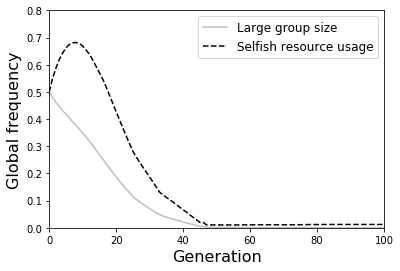

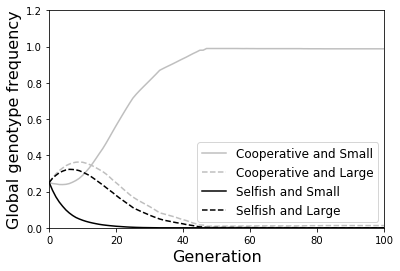

In [12]:
def plot_results(df):
    '''
    Function to plot the results contained in the report dataframe
    and create the FIgures as represented in the Simon T. Powers research 
    paper (Individual Selection for Cooperative Group Formation)
    '''
    tot = (df['Selfish and Small'] + df['Selfish and Large']+ df['Cooperative and Large'] + df['Cooperative and Small'])
    plt.plot(df['Iteration Num'], (df['Selfish and Small'] + df['Selfish and Large'])/tot, '0.75', 
             label = 'Large group size')
    plt.plot(df['Iteration Num'], (df['Selfish and Large'] + df['Cooperative and Large'])/tot, 'k--', 
             label = 'Selfish resource usage')
    plt.xlim(0, 100)
    plt.ylim(0, 0.8)
    plt.xlabel("Generation", fontsize=16)
    plt.ylabel("Global frequency", fontsize=16)
    plt.legend(fontsize=12)
    plt.show()
    
    plt.plot(df['Iteration Num'], df['Cooperative and Small']/tot, '0.75', label = 'Cooperative and Small')
    plt.plot(df['Iteration Num'], df['Cooperative and Large']/tot, '--', color= '0.75', label = 'Cooperative and Large')
    plt.plot(df['Iteration Num'], df['Selfish and Small']/tot, 'k', label = 'Selfish and Small')
    plt.plot(df['Iteration Num'], df['Selfish and Large']/tot, 'k--', label = 'Selfish and Large')
    plt.xlim(0, 100)
    plt.ylim(0, 1.2)
    plt.xlabel("Generation", fontsize=16)
    plt.ylabel("Global genotype frequency", fontsize=16)
    plt.legend(fontsize=12)
    plt.show()
    
plot_results(df2)

Selfish and Large
Mean:  243.12396694214877 Std:  417.5030572510998
Selfish and Small
Mean:  49.93388429752066 Std:  155.45899704084403
Cooperative and Large
Mean:  333.5206611570248 Std:  473.36273895498795
Cooperative and Small
Mean:  3371.9421487603304 Std:  996.5576229334603


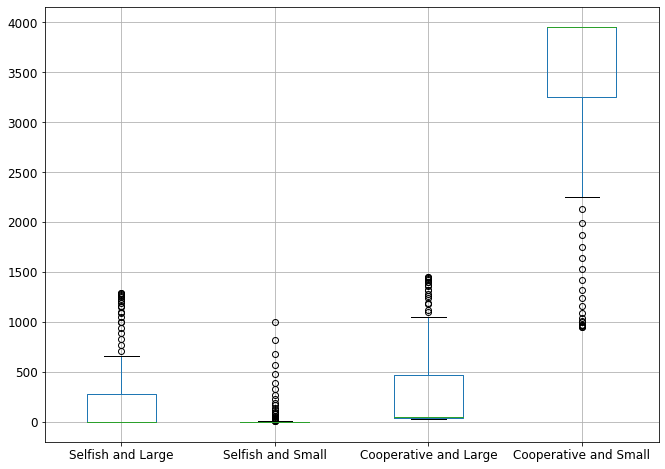

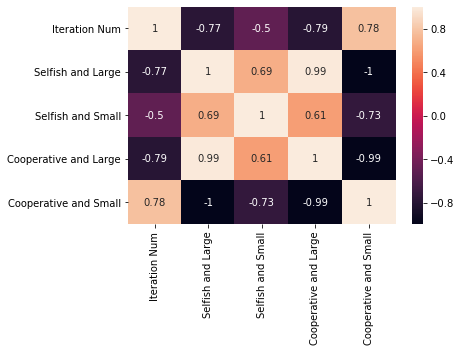

In [13]:
stats(df2)

### Varying K (Death Rate)

Iteration Number: 50
Iteration Number: 100


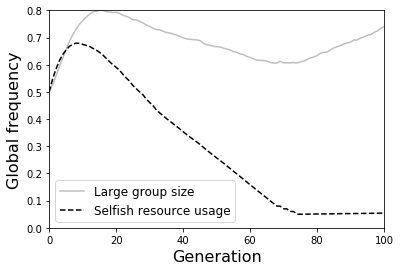

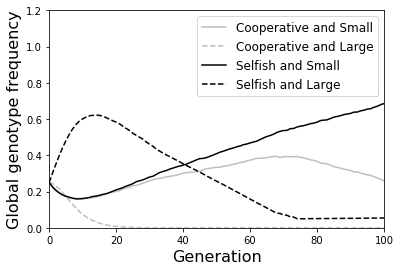

Selfish and Large
Mean:  962.4462809917355 Std:  816.9171635318637
Selfish and Small
Mean:  1857.9504132231405 Std:  799.4348401570035
Cooperative and Large
Mean:  71.25619834710744 Std:  207.9082970500255
Cooperative and Small
Mean:  1106.702479338843 Std:  316.63884697765764


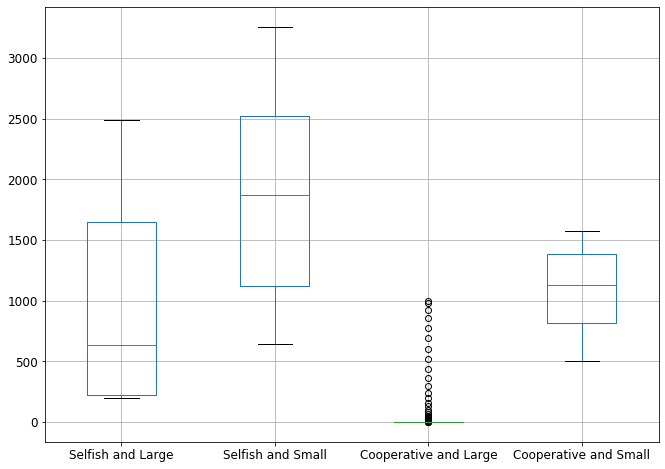

,Iteration Num,Selfish and Large,Selfish and Small,Cooperative and Large,Cooperative and Small
0,0,1000,1000,1000,1000
1,1,1207,897,979,914
2,2,1404,826,927,841
3,3,1592,768,861,776
4,4,1769,724,777,729


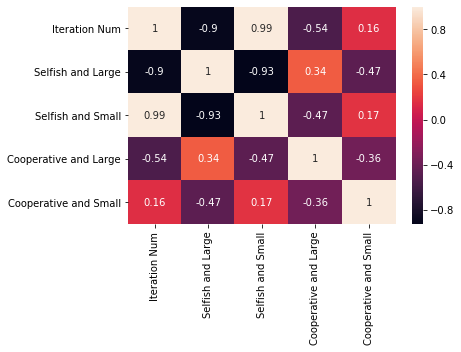

In [14]:
df3 = experiment(K=0.2)
plot_results(df3)
stats(df3)
df3.head()